In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/220301_lung_cancer_analysis.h5ad'

In [4]:
adata = sc.read_h5ad(
    '/mnt/d/Nishino/DRY/data/analysis/Omar_san/220224_lung_cancer_scanpy/write/220224_lung_cancer_processing.h5ad')        

In [5]:
adata

AnnData object with n_obs × n_vars = 208506 × 27578
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [6]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:16): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


extracting highly variable genes
    finished (0:00:40)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


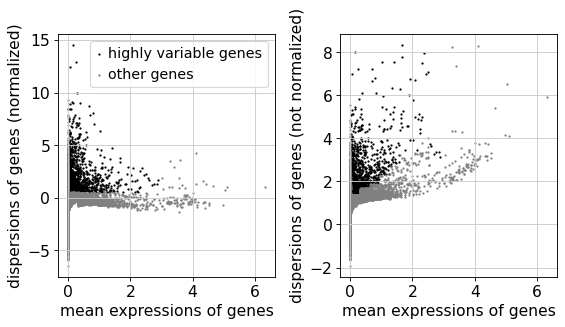

In [7]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [8]:
adata.raw = adata

In [9]:
adata = adata[:, adata.var.highly_variable]

In [10]:
adata

View of AnnData object with n_obs × n_vars = 208506 × 2243
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [11]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,n_counts
AAACCTGAGAAACCGC_LN_05,1690,19928.0,43.0,0.215777,1690,19928.0
AAACCTGAGAAACGCC_NS_13,611,1382.0,171.0,12.373372,611,1382.0
AAACCTGAGAAGGTGA_LUNG_N18,1113,3214.0,106.0,3.298071,1113,3214.0
AAACCTGAGACAAAGG_LUNG_N18,1100,2990.0,133.0,4.448161,1100,2990.0
AAACCTGAGACATAAC_LN_04,948,3880.0,76.0,1.958763,948,3880.0
...,...,...,...,...,...,...
TTTGTCATCTTGCCGT_LUNG_T30,2245,7981.0,198.0,2.480892,2245,7981.0
TTTGTCATCTTGTATC_EFFUSION_13,1199,4113.0,114.0,2.771699,1199,4113.0
TTTGTCATCTTTACAC_LUNG_N20,834,1979.0,97.0,4.901465,834,1979.0
TTTGTCATCTTTACAC_LUNG_T25,921,3342.0,94.0,2.812687,921,3342.0


In [12]:
adata.var

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
A2M,False,18910,0.433177,90.930717,90320.0,18910,True,0.482349,3.639923,4.248675
A2M-AS1,False,3250,0.016455,98.441292,3431.0,3250,True,0.050549,1.505685,0.778857
AARD,False,1753,0.015146,99.159257,3158.0,1753,True,0.017604,1.694605,1.179015
AATK,False,2592,0.015223,98.756870,3174.0,2592,True,0.023510,1.636142,1.055182
ABCA1,False,20542,0.176738,90.148005,36851.0,20542,True,0.197540,1.467033,0.696985
...,...,...,...,...,...,...,...,...,...,...
ZNF699,False,3843,0.018906,98.156888,3942.0,3843,True,0.049030,1.398352,0.551511
ZNF791,False,27773,0.157516,86.680000,32843.0,27773,True,0.303893,1.431406,0.621523
ZNF80,False,773,0.004201,99.629267,876.0,773,True,0.017121,1.843429,1.494246
ZNF831,False,2163,0.010594,98.962620,2209.0,2163,True,0.036099,1.485847,0.736836


In [13]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:07:27)


In [14]:
sc.pp.scale(adata)

In [15]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:11)


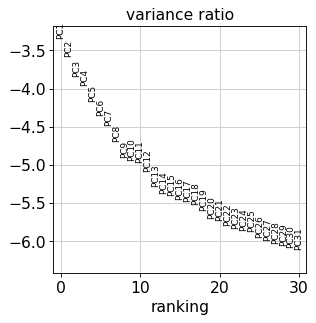

In [16]:
sc.pl.pca_variance_ratio(adata, log=True)

In [17]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 208506 × 2243
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)


In [19]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:44)


In [20]:
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")

running Leiden clustering
    finished: found 34 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:01:27)


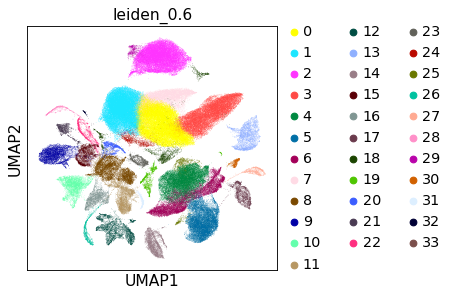

In [21]:
sc.pl.umap(adata, color='leiden_0.6')

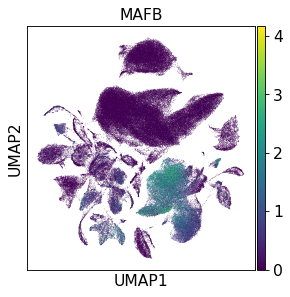

In [22]:
sc.pl.umap(adata, color='MAFB')

ranking genes
/home/analysis/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:27:47)


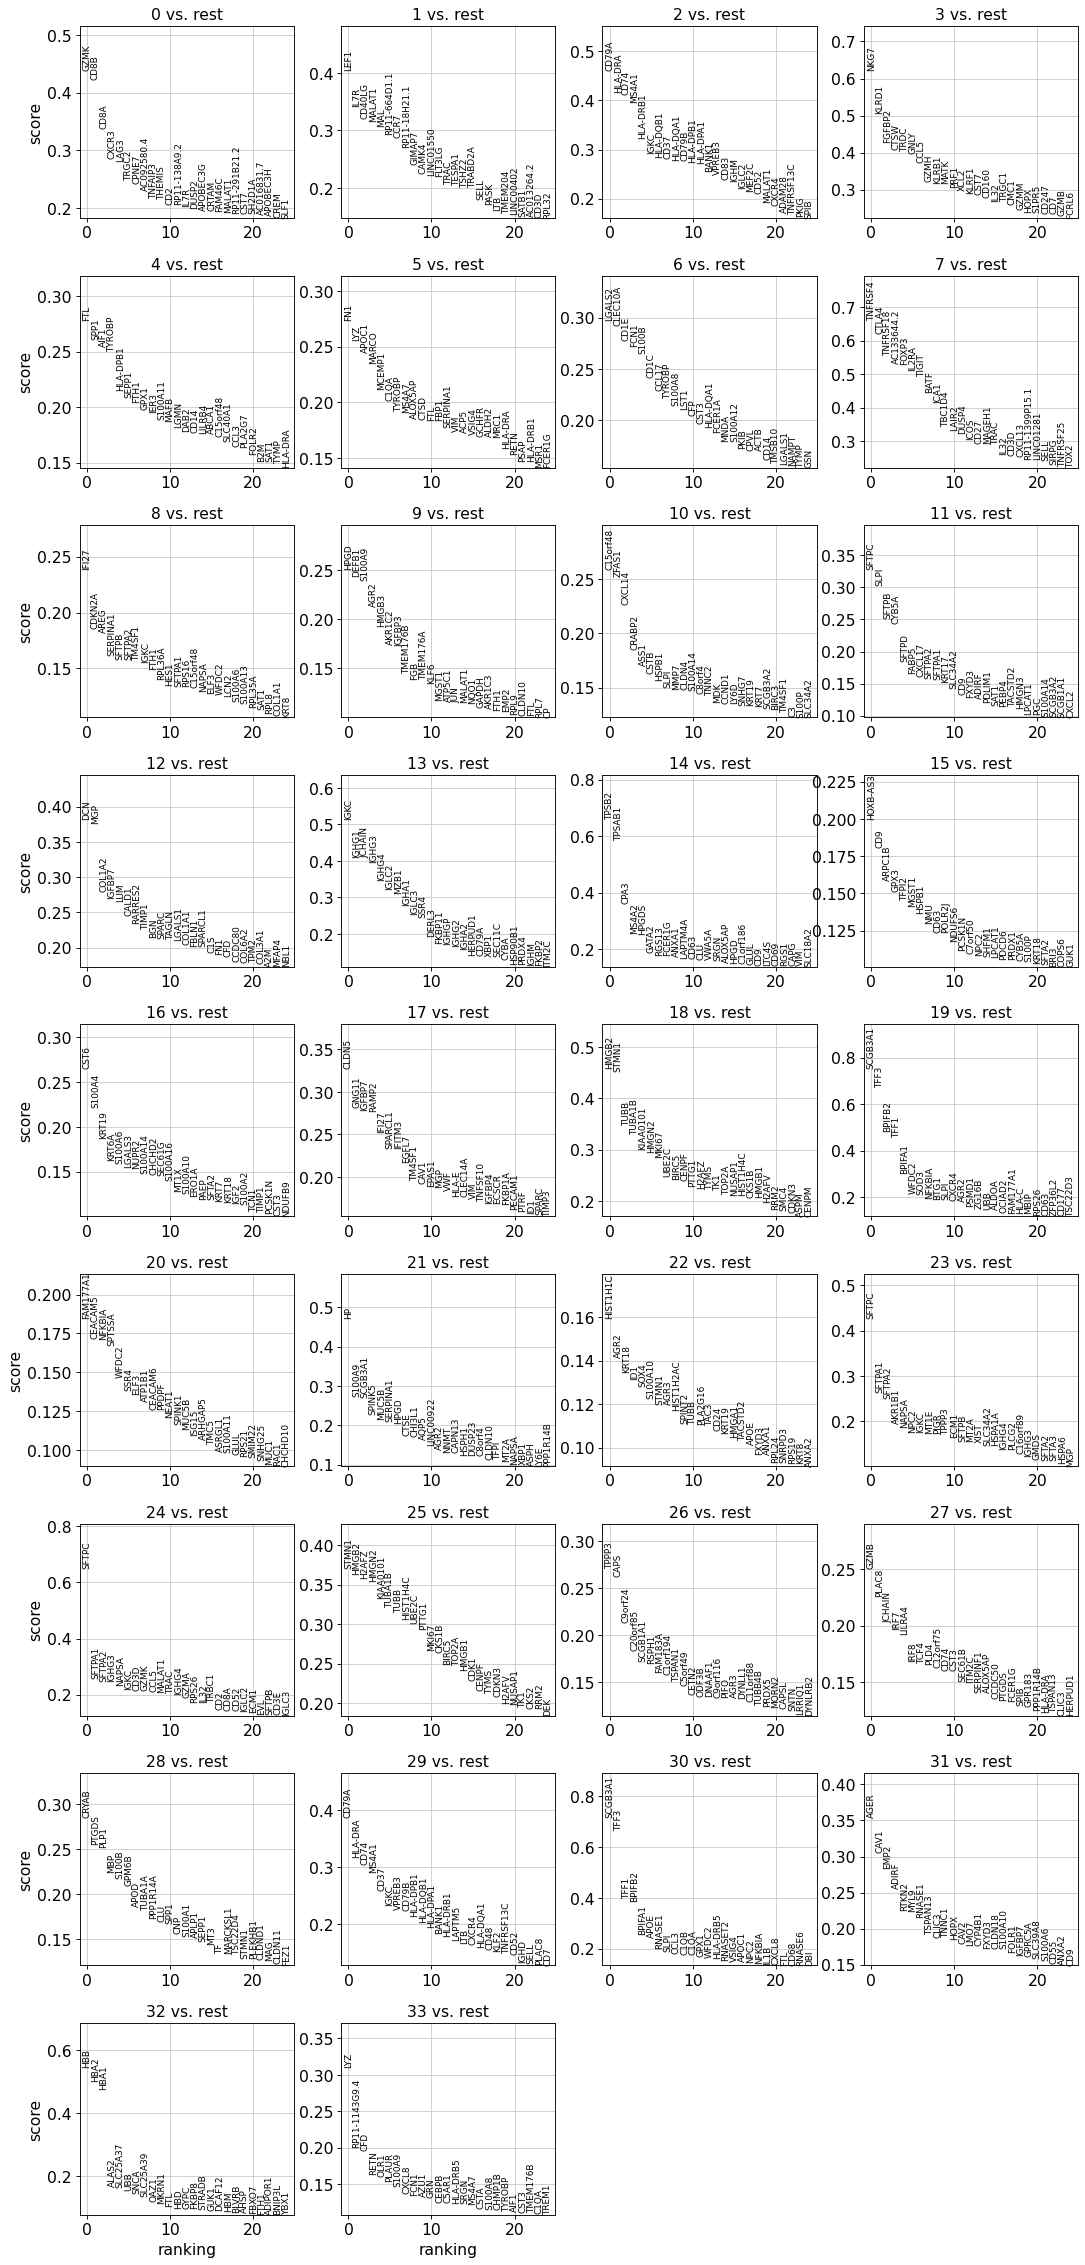

In [23]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [24]:
marker_genes = ['EPCAM','KRT19','KRT18','CDH1', # Epithelial cells
                'DCN','THY1','COL1A1','COL1A2', # Fibroblasts
                'PECAM1','CLDN5','FLT1','RAMP2', # Endothelial cells
                'CD3D','CD3E','CD3G','TRAC', # T lymphocytes
                'NKG7','GNLY','NCAM1','KLRD1', # NK cells
                'CD79A','IGHM','IGHG3','IGHA2', # B lymphocytes
                'LYZ','MARCO','CD68','FCGR3A', # Myeloid cells
                'KIT','MS4A2','GATA2', # MAST cells
                'OLIG1','OLIG2','MOG','CLDN11' # oligodendrocytes
               ]

In [ ]:
sc.pl.umap(adata, color=marker_genes )

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden_0.6')

In [ ]:
sc.pl.umap(adata, color='leiden_0.6')

In [ ]:
sc.pl.umap(adata, color='CCR2',color_map='RdGy_r' )

In [ ]:
cluster4 = adata.obs['leiden_0.6'] == '4'
cluster5 = adata.obs['leiden_0.6'] == '5'
cluster6 = adata.obs['leiden_0.6'] == '6'
cluster25 = adata.obs['leiden_0.6'] == '25'
cluster30 = adata.obs['leiden_0.6'] == '30'
cluster33 = adata.obs['leiden_0.6'] == '33'

myeloid = np.add(cluster4, cluster5)
myeloid = np.add(myeloid, cluster6)
myeloid = np.add(myeloid, cluster25)
myeloid = np.add(myeloid, cluster30)
myeloid = np.add(myeloid, cluster33)


adata_myelo = adata[myeloid,:]
adata_myelo

In [ ]:
adata_myelo.var

In [ ]:
adata_myelo.obs

In [ ]:
adata_myelo.write('write/220301_myeloids.h5ad')